In [2]:
!pip install basemap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 865 kB 6.1 MB/s            
     |████████████████████████████████| 17.3 MB 73.9 MB/s            
     |████████████████████████████████| 30.5 MB 79.6 MB/s            
     |████████████████████████████████| 46 kB 6.1 MB/s             
     |████████████████████████████████| 7.8 MB 71.3 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


In [3]:
#import section
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [6]:
dfev.head(5)

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train,age_group
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+,32+
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+,32+
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32,25-32
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24,0-24
4,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,20,M0-24,0-24


### 1. Plot the visualization plot for a sample of 1 lakh data points 

In [7]:
#get 1 lakh records into a dataframe
dfevsub = dfev.sample(n=100000, random_state=1)

In [8]:
dfevsub.shape

(100000, 9)

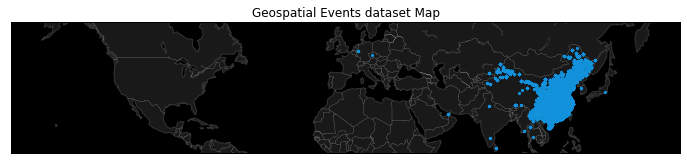

In [9]:
fig = plt.figure(figsize=(12, 12))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcoastlines(color='#333333')
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(dfevsub['latitude'].tolist(), dfevsub['longitude'].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title('Geospatial Events dataset Map')
plt.show()

### 2. Compare the event visualization plots based on the gender information [Can be done on the sample of 1 lakh points]

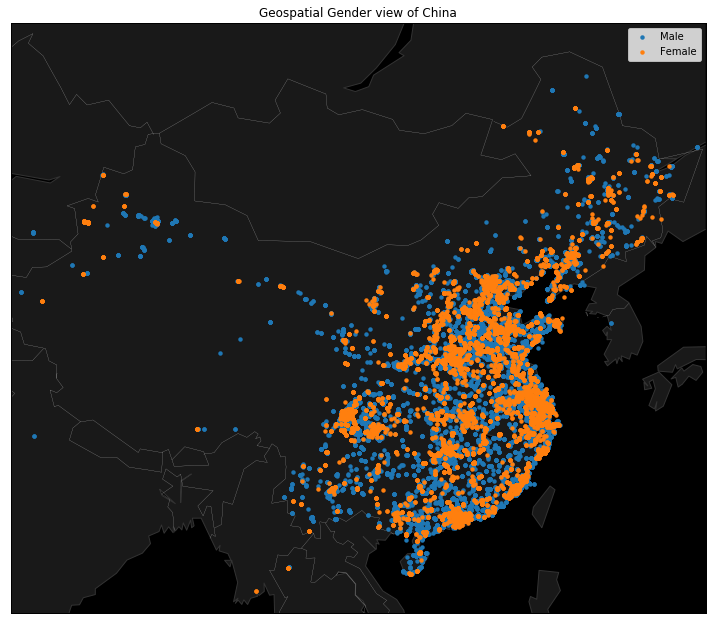

In [10]:
#From the above mercator plot we observed most the plot is in china.  So lets plot only china demographic
#China latitude, longitude
#llcrnrlon, urcrnrlon = 75, 135
#llcrnrlat, urcrnrlat = 15, 55
fig, ax = plt.subplots(figsize=(10,10))


# Mercator of China
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=55, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c',ax=ax) #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000',ax=ax) # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000',ax=ax)                # black background
m.drawcoastlines(color='#333333',ax=ax)
m.drawcountries(linewidth=0.15, color="w",ax=ax)              # thin white line for country borders

# Plot the data
#dataset for male
mxy = m(dfevsub[dfevsub['gender']=='M']['latitude'].tolist(), dfevsub[dfevsub['gender']=='M']['longitude'].tolist())
#dataset for female
fxy = m(dfevsub[dfevsub['gender']=='F']['latitude'].tolist(), dfevsub[dfevsub['gender']=='F']['longitude'].tolist())
#plot for male
ax.scatter(mxy[0], mxy[1], s=20, lw = 0, label='Male', cmap='viridis',  zorder=3)
#plot for female
ax.scatter(fxy[0], fxy[1], s=20, lw = 0, label='Female', cmap='viridis',  zorder=3)
ax.set_title('Geospatial Gender view of China')
ax.legend()
fig.tight_layout()
plt.show()

### 3. Compare the events visualization plots based on the different age bands

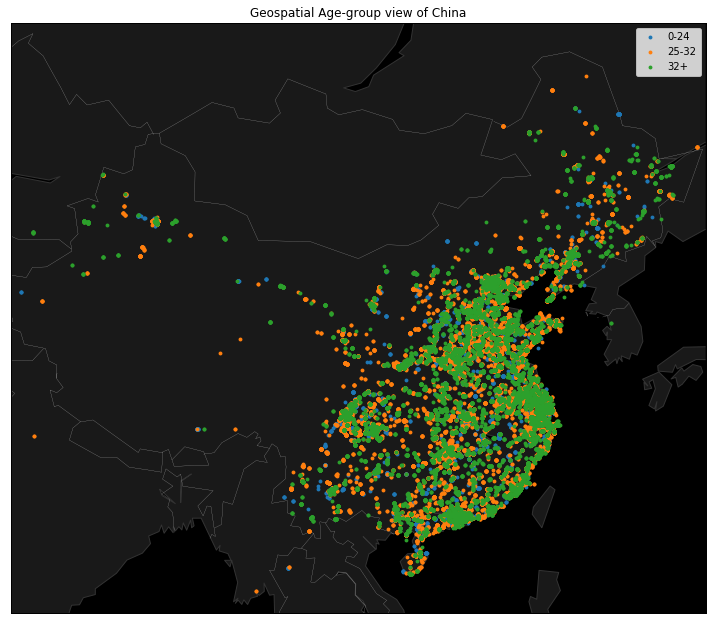

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

# Mercator of China
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=55, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c',ax=ax) #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000',ax=ax) # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000',ax=ax)                # black background
m.drawcoastlines(color='#333333',ax=ax)
m.drawcountries(linewidth=0.15, color="w",ax=ax)              # thin white line for country borders

#Dataset for Age group 0-24
g1xy = m(dfevsub[dfevsub['age_group']=='0-24']['latitude'].tolist(), dfevsub[dfevsub['age_group']=='0-24']['longitude'].tolist())
#Dataset for Age group 25-32
g2xy = m(dfevsub[dfevsub['age_group']=='25-32']['latitude'].tolist(), dfevsub[dfevsub['age_group']=='25-32']['longitude'].tolist())
#Dataset for Age group 32+
g3xy = m(dfevsub[dfevsub['age_group']=='32+']['latitude'].tolist(), dfevsub[dfevsub['age_group']=='32+']['longitude'].tolist())

#plot for Age group 0-24
ax.scatter(g1xy[0], g1xy[1], s=15, lw = 0, label='0-24', cmap='viridis', zorder=3)
#plot for Age group 25-32
ax.scatter(g2xy[0], g2xy[1], s=15, lw = 0, label='25-32', cmap='viridis', zorder=3)
#plot for Age group 32+
ax.scatter(g3xy[0], g3xy[1], s=15, lw = 0, label='32+', cmap='viridis', zorder=3)
ax.set_title('Geospatial Age-group view of China')
ax.legend()
fig.tight_layout()
plt.show()